In [1]:
import torch
a=torch.tensor([2.,3.],requires_grad=True)
b=torch.tensor([6.,4.],requires_grad=True)
Q= 3*a**3-b**2
print(Q)
external_grad=torch.tensor([1,1.])
Q.backward(gradient=external_grad)


tensor([-12.,  65.], grad_fn=<SubBackward0>)


# 计算矩阵相似度

In [40]:
%%time
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
x1=torch.rand(1,3000,device=device)
x2=torch.rand(1,3000,device=device)
# print(x1)
# print(x2)
# print(x1[0],x2[0])
print(torch.nn.functional.cosine_similarity(x1,x2))
# print(torch.nn.functional.cosine_similarity(x1[0],x2[0],dim=0))
#print(torch.randperm(5).tolist())

tensor([0.7375], device='cuda:0')
CPU times: total: 0 ns
Wall time: 1.99 ms


In [ ]:
import json
with open(r'D:\pytorch\pytorch_data\train\labels.json','rb') as f:
    file=json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\pytorch\\pytorch_data\\train\\labels.json'

In [17]:
file.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [73]:
import torch
import torch.nn as nn
import torch.nn.functional as F
a=torch.rand((1,1,5,5))
print(a)
res=nn.Conv2d(1,1,3)   #随机生成一个3*3的核，然后对a进行内积计算,第一个1为批次号，第二个1代表通道数（一般彩色图片为3通道）
print(res.get_parameter)
res(a)


tensor([[[[0.3766, 0.9215, 0.1354, 0.3062, 0.8772],
          [0.5052, 0.0679, 0.7439, 0.3053, 0.1638],
          [0.2162, 0.5970, 0.5581, 0.3412, 0.3516],
          [0.7264, 0.4226, 0.6113, 0.6618, 0.1397],
          [0.6823, 0.9110, 0.9721, 0.3101, 0.7996]]]])
<bound method Module.get_parameter of Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))>


tensor([[[[-0.0287, -0.0475, -0.2612],
          [-0.1240, -0.2255, -0.0541],
          [-0.1461,  0.0668, -0.1723]]]], grad_fn=<ThnnConv2DBackward0>)

In [59]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net.parameters)

<bound method Module.parameters of Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>


Using downloaded and verified file: ./data\cifar-10-python.tar.gz
Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


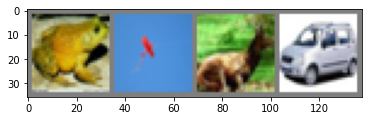

In [41]:
import torch
import torchvision
import torchvision.transforms as transforms
transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
batch_size=4
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,
                                      download=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,
                                        shuffle=True,num_workers=2)
testset=torchvision.datasets.CIFAR10(root='./data',train=False,
                                    download=True,transform=transform)
testloader=torch.utils.data.DataLoader(testset,batch_size=batch_size,
                                       shuffle=False,num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
    img=img/2+0.5
    nping=img.numpy()
    plt.imshow(np.transpose(nping,(1,2,0)))    #此处调整nping图片通道的次序
    plt.show()

dataiter=iter(trainloader)
images,lables=dataiter.next()
imshow(torchvision.utils.make_grid(images))


In [42]:
# train the network
for epoch in range(2):
    running_loss=0.0
    for i ,data in enumerate(trainloader,0):
        # get the inputs ;data is a list of [inputs ,labels]
        inputs,labels=data[0].to(device),data[1].to(device) #设置在device上执行

        # zero the parameter graditents 
        optimizer.zero_grad()
        #forward+backward+optimize
        outputs=net(inputs)  #正向传播
        loss=criterion(outputs,labels)  #计算损失函数
        loss.backward()   #反向传播
        optimizer.step()  #更新参数
        
        #print statistics
        running_loss +=loss.item()
        if i % 2000==1999:
            print('[%d, %5d] loss: %.3f' %
                 (epoch + i,i+1,running_loss/2000)) 
            running_loss=0.0

NameError: name 'optimizer' is not defined

In [8]:
# save trained model:
path='./cifar_net.pth'
torch.save(net.state_dict(),path)

torch.Size([4, 3, 32, 32])
(3, 36, 138)


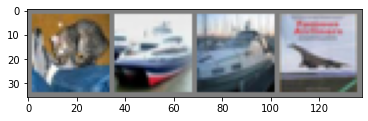

GroundTruth:   cat  ship  ship plane
outputs: tensor([[-3.2616, -4.0782,  3.2501,  3.0840,  2.3074,  2.4442,  4.4298,  0.7905,
         -5.0129, -3.5846],
        [-1.6881, -3.7810,  2.3157,  3.4443,  0.4706,  4.0667, -0.1186,  0.6686,
         -1.8627, -3.0995],
        [ 0.2880,  1.0571,  0.7940, -1.0519,  1.8804, -0.8514,  0.8490, -1.1389,
         -1.8305, -0.6919],
        [-1.6718, -1.4624,  0.7595, -0.0647,  3.1177,  0.8919,  0.9563,  3.4828,
         -3.5563, -1.3646]])
Predicted:  frog   dog  deer horse


In [38]:
# test the network on the test data
# display an image from the test set to get familiar,数据集中，一组图片有4张
dataiter =iter(testloader)
images,labels=dataiter.next()
#print images
print(images.shape)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth:',' '.join('%5s' % classes[labels[j]] for j in range(4)))

#load back in our saved model 
net=Net() #定义模型
net.load_state_dict(torch.load(path)) #加载模型参数
print("outputs:",outputs) #输出是一个10维的数组，最大值代表最可能的类别
_,predicted=torch.max(outputs,1)
print('Predicted:',' '.join('%5s' % classes[predicted[j]] for j in range(4)))

In [39]:
#查看模型对所有数据的预测情况
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()  #item从tensor(2)中，取出2

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 55 %


In [11]:

#查看每个类别的预测精度
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes} #使用for循环构建字典
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1  #按对应的键、值更新字典的值
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class plane is: 63.5 %
Accuracy for class car   is: 59.0 %
Accuracy for class bird  is: 58.9 %
Accuracy for class cat   is: 36.2 %
Accuracy for class deer  is: 37.3 %
Accuracy for class dog   is: 37.5 %
Accuracy for class frog  is: 73.6 %
Accuracy for class horse is: 52.8 %
Accuracy for class ship  is: 71.8 %
Accuracy for class truck is: 59.9 %


# 下面是步骤拆解分析：

In [48]:
import torch
import torch.nn as nn
input=torch.rand((2,3))
m=nn.Linear(3,2,bias=False)  #m默认生产2行3列，在m()计算时，会自动转置 
print(m.weight.shape)
print(input.shape)
output=m(input)   #执行input*m.T 
print(output)

torch.Size([2, 3])
torch.Size([2, 3])
tensor([[-0.1558, -0.4192],
        [ 0.0150, -0.2623]], grad_fn=<MmBackward0>)


In [59]:
import numpy as np
a=np.array([[0.7379, 0.7379, 0.2397],
        [0.7074, 0.4134, 0.0736]])
b=np.array([[ 0.2380, -0.2760, -0.5327],
         [-0.1174, -0.4130, -0.1159]])
np.dot(a,b.T)


array([[-0.15572839, -0.41916339],
       [ 0.01505608, -0.2623132 ]])

In [57]:
0.7074*0.2380+0.4134*-0.2760+0.0736*-0.5327

0.015056079999999993

In [13]:
# tensor转numpy
input=torch.randn(3,3)
input.numpy() 

array([[-0.10451823, -0.56034446, -0.18969531],
       [-1.1719816 , -0.0919904 ,  0.17458288],
       [-0.7803322 ,  0.8791406 ,  1.7265769 ]], dtype=float32)

In [14]:
import torch,torchvision
model=torchvision.models.resnet18(pretrained=True) #从torchvision中加载一个与训练的数据集模型
data=torch.randn(1,3,64,64)
labels=torch.rand(1,1000)
prediction=model(data) #forward pass 
loss=(prediction-labels).sum()  #设置损失函数
loss.backward() #backward pass ,计算梯度，并存储在.grad属性中
optim=torch.optim.SGD(model.parameters(),lr=1e-2,momentum=0.9)
optim.step() # initiate gradient descent 


# Differentiation in autograd

In [60]:
import torch
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)
Q=3*a**3-b**2
external_grad = torch.tensor([1., 1.]) 
#backward需要传入一个和Q的shape一样的梯度参数，并且代表的是Q的梯度，
#也可以把Q作为一个标量(scalar),进行隐式调用，如：Q.sum().backward()
Q.backward(gradient=external_grad) 
#反向传播之后，梯度保存在变量a.grad和b.grad中
print(a.grad)
print(b.grad)

tensor([36., 81.])
tensor([-12.,  -8.])


In [16]:
# 冻结参数
from torch import nn ,optim
model=torchvision.models.resnet18(pretrained=True)  #resnet18为torch自带的模型参数
for param in model.parameters():
    # Freeze all the parameters in the network
    param.requires_grad =False
# linetuning
# model.resnet18模型的最后一层为model.fc,可以通过model.named_modules查看每一层的名称即参数
model.fc=nn.Linear(512,10) #将模型的最后一层用线性表示

In [17]:
model.named_modules

<bound method Module.named_modules of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tru

# NEURAL NETWORKS

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel ,6 output channels,5*5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5) #单通道，输出6通道，5*5的核大小，生成6通道，5*5的张量
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y=wx+b
        # 5*5 from image dimension,生成120行，400(16*25)列的张量,计算时对该张量先转置，再计算
        # 16*5*5必须为输入的列数(维度数),120为输出的维度数
        self.fc1 = nn.Linear(16 * 5 * 5, 120) 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    #定义正向传播算法
    def forward(self,x):
        # Max pooling over a (2,2) window
        t=F.relu(self.conv1(x))
        print('一次卷积后维度',t.shape) #卷积之后，32*32维转为维28*28维度
        x=F.max_pool2d(F.relu(self.conv1(x)),(2,2)) #池化层之后，维度将为14     
        print('一次池化后维度',x.shape)
        # if the size is a square ,you can specify with a single number
        t1=self.conv2(x)
        print('二次卷积后维度',t1.shape)
        x=F.max_pool2d(F.relu(self.conv2(x)),2)
        print("二次池化后维度：",x.shape)
        x=torch.flatten(x,1) # flatten all dimensions except the batch dimension
        print("二次池化x展开后维度",x.shape)
        x=F.relu(self.fc1(x)) # 该模型中，一个32*32的单通道图片经过二次池化，并展开后，维度维（1，400）
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x
net =Net()
print(net)
params=list(net.parameters())
#print(params) # 输出模型所有参数
input=torch.randn(1,1,32,32)
out=net(input)
print(out)


Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
一次卷积后维度 torch.Size([1, 6, 28, 28])
一次池化后维度 torch.Size([1, 6, 14, 14])
二次卷积后维度 torch.Size([1, 16, 10, 10])
二次池化后维度： torch.Size([1, 16, 5, 5])
二次池化x展开后维度 torch.Size([1, 400])
tensor([[ 0.1891,  0.0486,  0.0138,  0.0427,  0.0125, -0.2100,  0.1028,  0.0508,
         -0.0482,  0.1779]], grad_fn=<AddmmBackward>)


In [19]:
net.zero_grad() #将随机下降参数设置为0
out.backward(torch.randn(1,10)) #反向传播

In [20]:
#torch.nn支持一个批次的运算，并非一个单一的样本
# for example, nn.Conv2d will take in a 4D Tensor of nSamples x nChannels x Height x Width

In [21]:
target=torch.randn(10)
print(target.shape)
target=target.view(1,-1) #更改随机数组的维度
target.shape
criterion=nn.MSELoss() # 定义mean-squared error 做为损失函数
loss=criterion(out,target) #输出目标值和预测值之间的均方误差
print(loss)

torch.Size([10])
tensor(0.4785, grad_fn=<MseLossBackward>)


In [22]:
# 查看反向传播前后，偏执项前后的差异，由于前面设置了冻结参数，此次执行反向传播会报错
net.zero_grad()     # zeroes the gradient buffers of all parameters
print('conv1.bias.grad before backward') #反向传播前，conv1层的偏置项的值
print(net.conv1.bias.grad)
loss.backward()
print('conv1.bias.grad after backward')  #反向传播后，conv1层的偏置项的值
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])


RuntimeError: Trying to backward through the graph a second time (or directly access saved variables after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved variables after calling backward.

In [ ]:
#update the weights
learning_rate=0.01
for f in net.parameters():
    f.data.sub(f.grad.data * learning_rate)
# torch 提供了更新权重的lib (torch.optim),如SGD,Nesterov-SGD,Adam,RMSProp.
# 下面演示optim的应用示例：
import torch.optim as optim
# create your otimizer
optimizer=optim.SGD(net.paramters(),lr=0.01)
# in training loop:
optimizer.zero_grad()
output=net(input)
loss=criterion(output,target)
loss.backward()
optimizer.step() # does the update

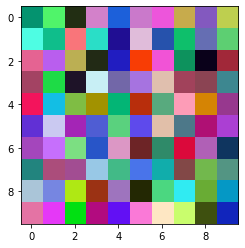

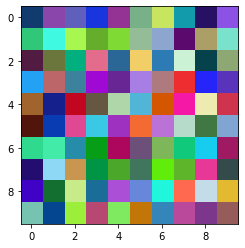

In [34]:
import matplotlib.pyplot as plt
import torch
img1=torch.rand((10,10,3))
img2=torch.randint(0,255,(10,10,3))
plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()